# HoSt Predictive Model

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [5]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [7]:
import numpy as np

np.random.seed(42)

In [18]:
import sys
!{sys.executable} -m pip install --upgrade Prophet

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/13.3 MB 4.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/13.3 MB 5.0 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/13.3 MB 5.0 MB/s eta 0:00:03
   ----------- ---------------------------- 3.9/13.3 MB 5.1 MB/s eta 0:00:02
   --------------- ------------------------ 5.2/13.3 MB 5.3 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/13.3 MB 5.1 MB/s eta 0:00:02
   --------------------- ------------------ 7.1/13.3 MB 5.1 MB/s eta 0:00:02
   ----------------------- ---------------- 7.9/13.3 MB 5.1 MB/s eta 0:00:02
   -------------------------- ------------- 8.9/13.3 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 11.3/13.3 MB 5.0 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# --------------------------------------
# Complete drop-in replacement (copy-paste)
# Forecasts hourly prices for all of 2024
# using a SARIMAX seasonal ARIMA model
# --------------------------------------
# If statsmodels is missing, run:
#   pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 1) Load and clean
df = (pd.read_csv("NetherlandsTrain.csv", parse_dates=["Datetime (UTC)"])
        .sort_values("Datetime (UTC)")
        .dropna(subset=["Price (EUR/MWhe)"]))

# Prophet wants columns named 'ds' (datestamp) and 'y' (value)
df = df.rename(columns={"Datetime (UTC)": "ds",
                        "Price (EUR/MWhe)": "y"})


C:\Users\amirg\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [20]:
# 2) Initialize and fit Prophet
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
m.fit(df)

15:26:23 - cmdstanpy - INFO - Chain [1] start processing
15:27:23 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# 3) Create a future DataFrame for every hour of 2024
future = m.make_future_dataframe(
    periods=24 * 366,  # 2024 is a leap year: 366 days
    freq="H"
)
# But make_future_dataframe extends beyond your last date – 
# we only need 2024 so we can slice:
future_2024 = future[
    (future['ds'] >= "2024-01-01") &
    (future['ds'] <  "2025-01-01")
].reset_index(drop=True)

In [23]:
# 4) Predict
forecast = m.predict(future_2024)

In [29]:
target_ts = "2024-12-30 20:00:00"   # ← change this to whichever hour you care about
pred_value = forecast.loc[forecast['ds'] == target_ts, 'yhat'].values

if len(pred_value):
    print(f"Forecasted price at {target_ts} is {pred_value[0]:.2f} EUR/MWhe")
else:
    print(f"No forecast found for {target_ts}.")

Forecasted price at 2024-12-30 20:00:00 is -123.87 EUR/MWhe


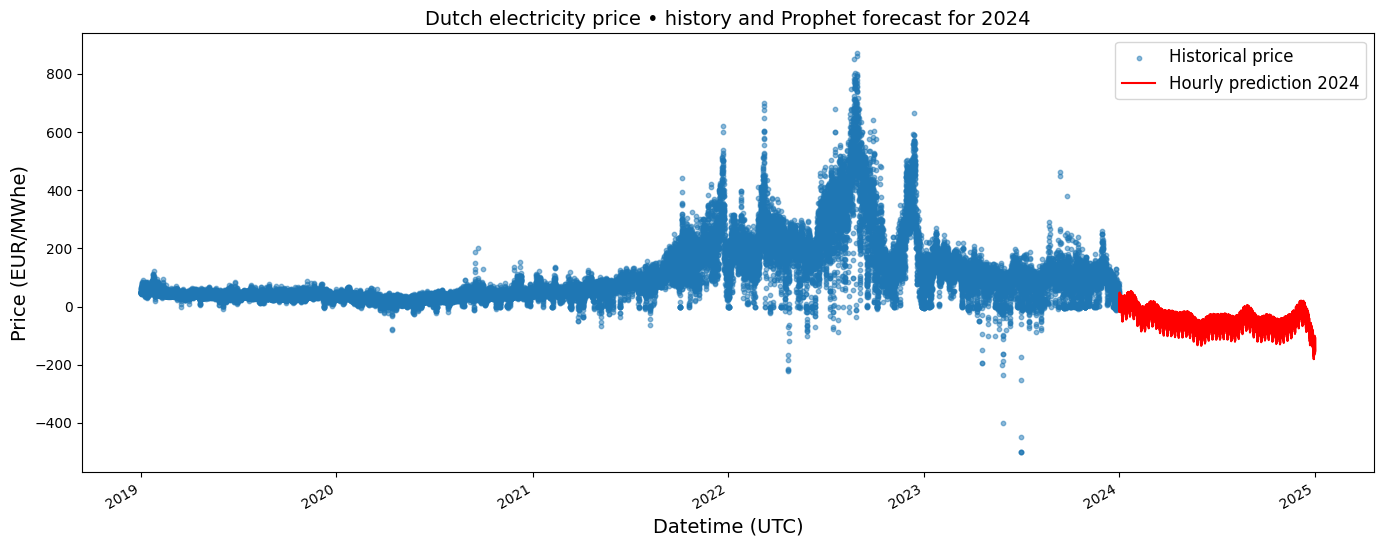

In [ ]:
# 5) Plot
plt.figure(figsize=(14, 6))
# historical
plt.scatter(df['ds'], df['y'],
            s=10, alpha=0.5, label="Historical price")
# forecasted
plt.plot(forecast['ds'], forecast['yhat'],
         color="red", linewidth=1.5,
         label="Hourly prediction 2024")

plt.xlabel("Datetime (UTC)")
plt.ylabel("Price (EUR/MWhe)")
plt.title("Dutch electricity price • history and Prophet forecast for 2024")
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# ── 5. Peek at the first 11 hourly forecasts of 2024 ─────────
pred_slice = pred_2024.loc["2024-01-01 01:00:00" : "2024-01-01 11:00:00"]
print(pred_slice)

pred_slice = pred_2024.loc["2024-07-01 01:00:00" : "2024-07-01 11:00:00"]
print(pred_slice)

Series([], Freq: h, Name: pred, dtype: float64)
Series([], Freq: h, Name: pred, dtype: float64)
